<a href="https://colab.research.google.com/github/TieuDiem/VGG16-From-Scratch-/blob/main/VGG16_From_Scratch_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Description for Conv2D**


* filtes: number of kernel 
* kernel_size: size of window kernel (3x3)
* padding: "same" : output after apply convolution size same with input.
* input_shape: shape of input image

_________________________________________

$$output{\_size}= \frac {input{\_size}{\space} - {\space}kernel{\_size}}{stride} {\space}+1$$
## Example:
* input_shape =(224,224)
* kernel_size =(3 * 3)
* stride =1
* output_size = $$\frac{224-3}{1}+1 = 221$$

_________________________________________
* How to calculate after Conv2D: $$param = F * K * D$$

* $${Total\_param} = \sum_{x = 0}^{b} {\space}param_i$$
## With :
* F: number of filters
* K: kernel size
* K: deep of input shape

## Example :
```
 Conv2D(filters =64,kernel_size =(3,3),padding="same",activation='relu',input_shape =(224,224,3))

```
$$param = filters{\space}{*}{\space}{kernel\_size}{\space} * {\space}deep {\space}+{\space}filters = 64{\space}*{\space}3{\space}*{\space}*3{\space}*{\space}3{\space}+{\space}64={\space} 1972$$

```
Conv2D(filters =64,kernel_size =(3,3),padding="same",activation='relu',input_shape =(224,224,3))
```
Deep in next Conv2D = filters of previous Conv2D =64 

$$param = 64 * 3 *3 * 64 + 64 = 36928  $$
$$total{\_param} = 1972 +   36928  =  38,720$$

```
 MaxPooling2D(pool_size=(2,2),strides=(2,2))
```
MaxPooling2D no effect to total number parameter in last of block, It's just change size of output








In [73]:
model = tf.keras.Sequential([
    # Block 1 
    Conv2D(filters =64,kernel_size =(3,3),padding="same",activation='relu',input_shape =(224,224,3)),
    Conv2D(filters =64,kernel_size= (3,3),padding="same",activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    #Block 2
    Conv2D(filters =128,kernel_size=(3,3),padding="same",activation="relu"),
    Conv2D(filters =128,kernel_size=(3,3),padding="same",activation='relu'),
    MaxPooling2D(pool_size =(2,2),strides =(2,2)),

    #Block 3
    Conv2D(filters =256,kernel_size=(3,3),padding="same",activation='relu'),
    Conv2D(filters =256,kernel_size=(3,3),padding="same",activation='relu'),
    Conv2D(filters =256,kernel_size=(3,3),padding="same",activation='relu'),
    MaxPooling2D(pool_size =(2,2),strides =(2,2)),

    #Block 4
    Conv2D(filters =512,kernel_size=(3,3),padding="same",activation='relu'),
    Conv2D(filters =512,kernel_size=(3,3),padding="same",activation='relu'),
    Conv2D(filters =512,kernel_size=(3,3),padding="same",activation='relu'),
    MaxPooling2D(pool_size =(2,2),strides =(2,2)),

    #Block 5
    Conv2D(filters =512,kernel_size=(3,3),padding="same",activation='relu'),
    Conv2D(filters =512,kernel_size=(3,3),padding="same",activation='relu'),
    Conv2D(filters =512,kernel_size=(3,3),padding="same",activation='relu'),
    MaxPooling2D(pool_size =(2,2),strides =(2,2)),

    #Fully Connected Layer
])
model.build()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_76 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_78 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                

In [74]:
path_img = r'/content/134206.jpg'
img=cv2.resize(cv2.imread(path_img),(224,224))
result = model(np.array([img]))
result.shape

TensorShape([1, 7, 7, 512])

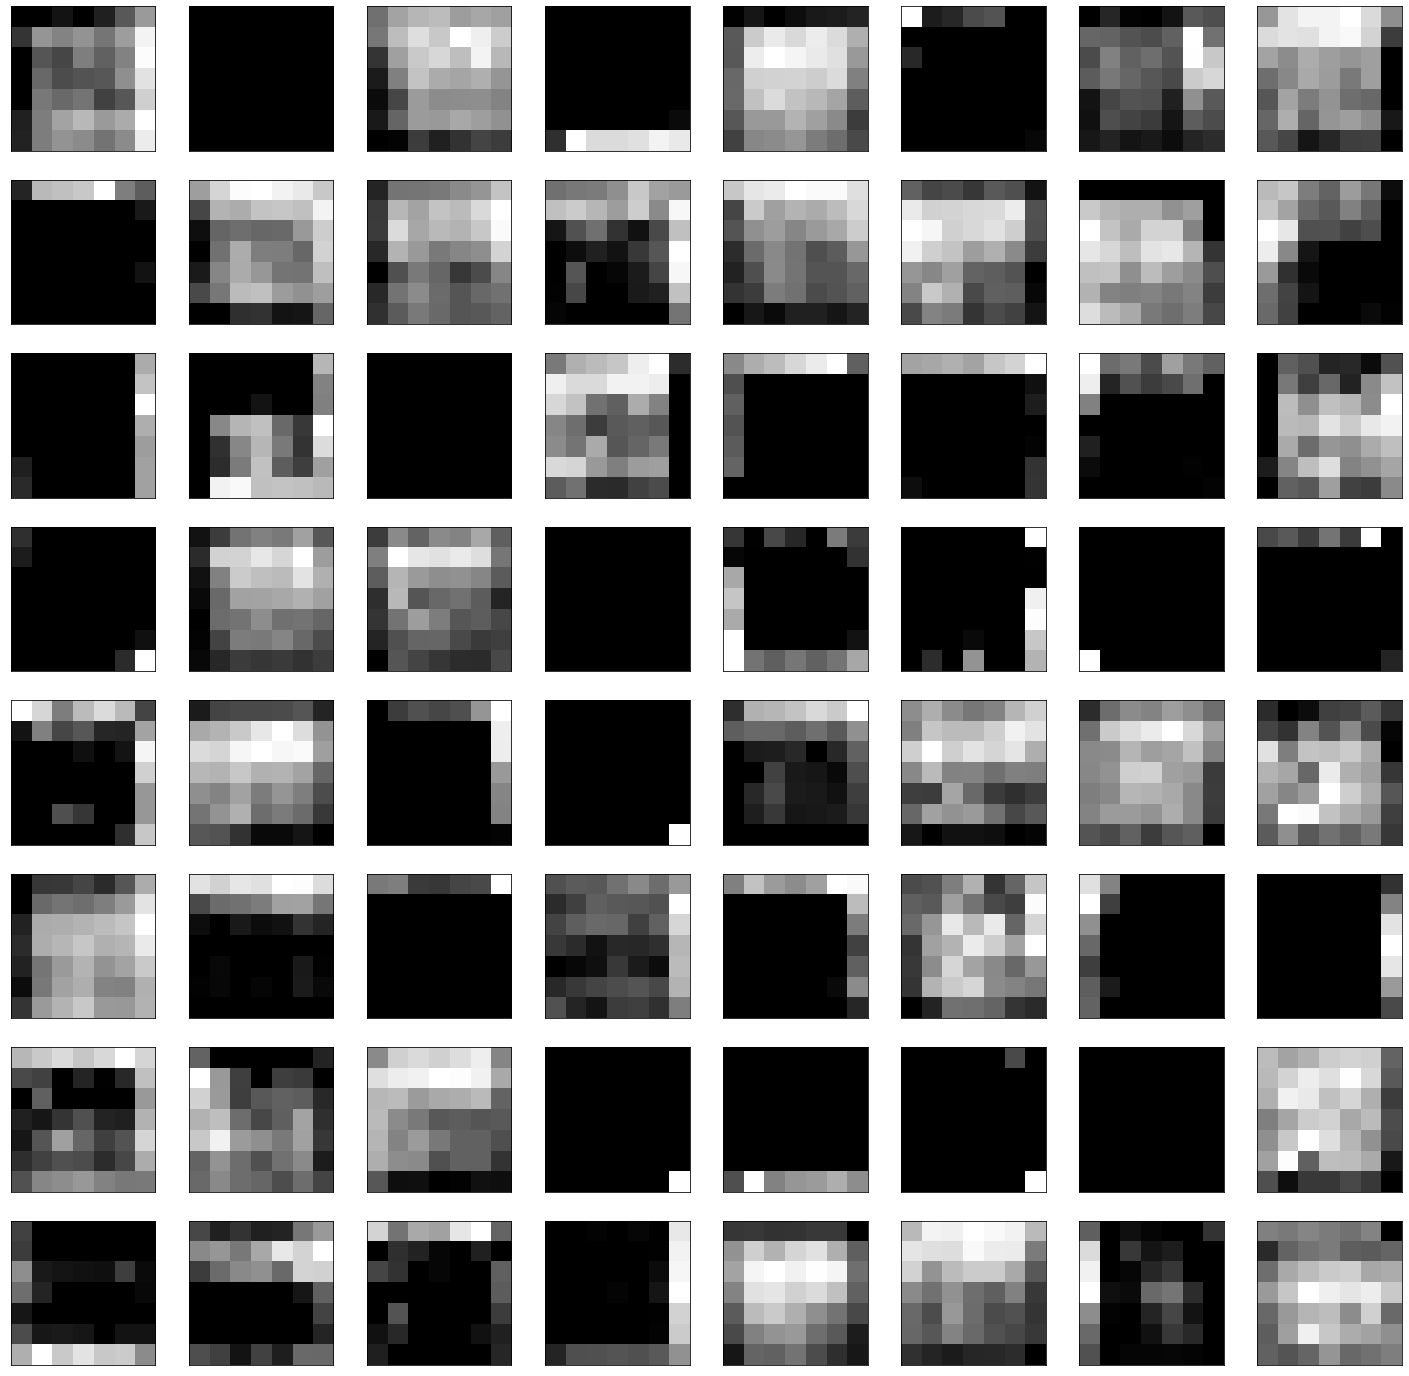

In [75]:
fig =plt.figure(figsize=(25,25))
for id in range(64):
  feature_img = result[0,:,:,id]
  ax = plt.subplot(8,8,id+1)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.imshow(feature_img,cmap = 'gray')
plt.show()